# Loading and Merging

In [ ]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_d = pd.read_csv('/content/drive/MyDrive/HackDiversityTeam17/diamonds_for_sale_2023.csv')
df_d.head()


,index,carat,cut,color,clarity,depth,table,length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2023
1,1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2023
2,2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,2023
3,3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2023
4,4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,2023


In [ ]:
df_e = pd.read_csv('/content/drive/MyDrive/HackDiversityTeam17/wholesale_diamonds_2011_2022.csv')
df_e.head()


,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2011
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2011
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2011
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2011
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2011


In [ ]:
num_df = df_e[['depth','carat','table','length (mm)','width (mm)','height (mm)','year','cost (dollars)']]
num_df.head()

,depth,carat,table,length (mm),width (mm),height (mm),year,cost (dollars)
0,61.5,0.23,55.0,3.95,3.98,2.43,2011,326
1,56.9,0.23,65.0,4.05,4.07,2.31,2011,327
2,62.4,0.29,58.0,4.20,4.23,2.63,2011,334
3,63.3,0.31,58.0,4.34,4.35,2.75,2011,335
4,62.8,0.24,57.0,3.94,3.96,2.48,2011,336


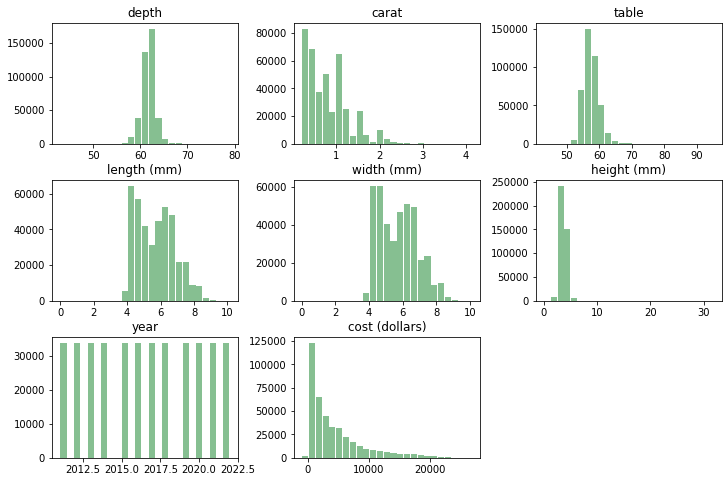

In [ ]:
ax = num_df.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]

In [ ]:
print(df_e.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407280 entries, 0 to 407279
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           407280 non-null  int64  
 1   carat           405232 non-null  float64
 2   cut             407280 non-null  object 
 3   color           407280 non-null  object 
 4   clarity         407280 non-null  object 
 5   depth           407280 non-null  float64
 6   table           407280 non-null  float64
 7   cost (dollars)  407280 non-null  int64  
 8   length (mm)     407280 non-null  float64
 9   width (mm)      407280 non-null  float64
 10  height (mm)     407280 non-null  float64
 11  year            407280 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 37.3+ MB
None


In [ ]:
df_e = df_e.dropna(subset=['carat'])

In [ ]:
#df_e = df_e.drop(df_e[df_e['cost (dollars)'] <= 0].index, inplace = True)
#df_e['cost (dollars)']=df_e['cost (dollars)'].apply(lambda x: 0 if x<0 else x)
df_e = df_e[df_e['cost (dollars)'] >= 0]
df_e.head()

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2011
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2011
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2011
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2011
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2011


In [ ]:
print(df_e.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403195 entries, 0 to 407279
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           403195 non-null  int64  
 1   carat           403195 non-null  float64
 2   cut             403195 non-null  object 
 3   color           403195 non-null  object 
 4   clarity         403195 non-null  object 
 5   depth           403195 non-null  float64
 6   table           403195 non-null  float64
 7   cost (dollars)  403195 non-null  int64  
 8   length (mm)     403195 non-null  float64
 9   width (mm)      403195 non-null  float64
 10  height (mm)     403195 non-null  float64
 11  year            403195 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 40.0+ MB
None


In [ ]:
len(df_e[df_e['carat'].isnull()])

df_e.head()

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2011
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2011
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2011
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2011
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2011


In [ ]:
df_e.to_csv('CleanDiamondsTraining.csv', index=True)
df_e.to_csv('/content/drive/MyDrive/HackDiversityTeam17/CleanDiamondsTraining.csv')

In [ ]:
cat_df = df_e[['cut','color','clarity','year']]

In [ ]:
for col in cat_df:
    print(cat_df[col].unique())

['Ideal' 'Good' 'Premium' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'VS1' 'VS2' 'VVS2' 'VVS1' 'SI1' 'I1' 'IF']
[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [ ]:
num_df = df_e[['depth','carat','table','length (mm)','width (mm)','height (mm)','year','cost (dollars)']]
num_df.head()


,depth,carat,table,length (mm),width (mm),height (mm),year,cost (dollars)
0,61.5,0.23,55.0,3.95,3.98,2.43,2011,326
1,56.9,0.23,65.0,4.05,4.07,2.31,2011,327
2,62.4,0.29,58.0,4.20,4.23,2.63,2011,334
3,63.3,0.31,58.0,4.34,4.35,2.75,2011,335
4,62.8,0.24,57.0,3.94,3.96,2.48,2011,336


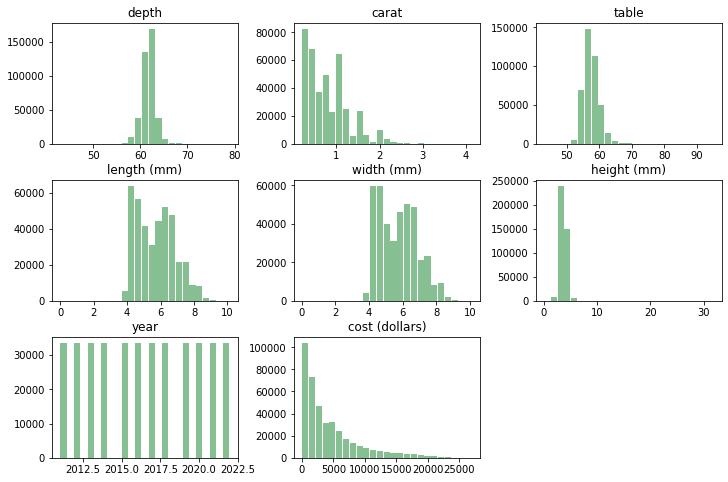

In [ ]:
ax = num_df.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]

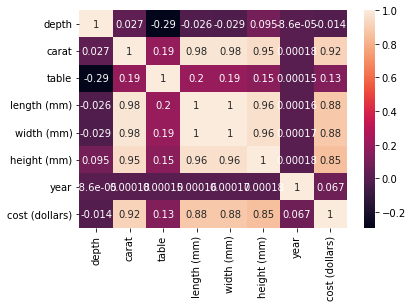

In [ ]:
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
corr_pairs = corr_matrix.unstack()
print(corr_pairs)

depth           depth             1.000000
                carat             0.027497
                table            -0.294143
                length (mm)      -0.025652
                width (mm)       -0.028533
                                    ...   
cost (dollars)  length (mm)       0.880167
                width (mm)        0.882147
                height (mm)       0.849544
                year              0.066827
                cost (dollars)    1.000000
Length: 64, dtype: float64


In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

depth           table            -0.294143
table           depth            -0.294143
width (mm)      depth            -0.028533
depth           width (mm)       -0.028533
                length (mm)      -0.025652
                                    ...   
length (mm)     length (mm)       1.000000
table           table             1.000000
carat           carat             1.000000
year            year              1.000000
cost (dollars)  cost (dollars)    1.000000
Length: 64, dtype: float64


In [ ]:
negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

depth           table            -0.294143
table           depth            -0.294143
width (mm)      depth            -0.028533
depth           width (mm)       -0.028533
                length (mm)      -0.025652
length (mm)     depth            -0.025652
depth           cost (dollars)   -0.013746
cost (dollars)  depth            -0.013746
depth           year             -0.000086
year            depth            -0.000086
dtype: float64


In [ ]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

cost (dollars)  height (mm)       0.849544
height (mm)     cost (dollars)    0.849544
length (mm)     cost (dollars)    0.880167
cost (dollars)  length (mm)       0.880167
                width (mm)        0.882147
width (mm)      cost (dollars)    0.882147
cost (dollars)  carat             0.915344
carat           cost (dollars)    0.915344
                height (mm)       0.946206
height (mm)     carat             0.946206
                width (mm)        0.961687
width (mm)      height (mm)       0.961687
height (mm)     length (mm)       0.962398
length (mm)     height (mm)       0.962398
width (mm)      carat             0.975667
carat           width (mm)        0.975667
length (mm)     carat             0.976104
carat           length (mm)       0.976104
width (mm)      length (mm)       0.998137
length (mm)     width (mm)        0.998137
depth           depth             1.000000
height (mm)     height (mm)       1.000000
width (mm)      width (mm)        1.000000
length (mm)

In [ ]:
#correlations = strong_pairs.to_frame()
correlations = pd.DataFrame(strong_pairs).reset_index()
correlations.columns =['Attribute 1','Attribute 2', 'Correlations']
correlations
#for col in correlations.columns:
    #print(col)
#correlations[correlations['ids'].str.contains("cost")]

,Attribute 1,Attribute 2,Correlations
0,cost (dollars),height (mm),0.849544
1,height (mm),cost (dollars),0.849544
2,length (mm),cost (dollars),0.880167
3,cost (dollars),length (mm),0.880167
4,cost (dollars),width (mm),0.882147
5,width (mm),cost (dollars),0.882147
6,cost (dollars),carat,0.915344
7,carat,cost (dollars),0.915344
8,carat,height (mm),0.946206
9,height (mm),carat,0.946206


In [ ]:
correlations = correlations.sort_values(by=['Attribute 1','Attribute 2','Correlations'])
correlations = correlations.drop_duplicates(subset=['Attribute 1','Attribute 2','Correlations'], keep='last')

In [ ]:
correlations = correlations[correlations['Attribute 1'] != correlations['Attribute 2']]

In [ ]:
correlations

,Attribute 1,Attribute 2,Correlations
7,carat,cost (dollars),0.915344
8,carat,height (mm),0.946206
17,carat,length (mm),0.976104
15,carat,width (mm),0.975667
6,cost (dollars),carat,0.915344
0,cost (dollars),height (mm),0.849544
3,cost (dollars),length (mm),0.880167
4,cost (dollars),width (mm),0.882147
9,height (mm),carat,0.946206
1,height (mm),cost (dollars),0.849544


In [ ]:
co1 = correlations.drop_duplicates(subset='Correlations')
co1

,Attribute 1,Attribute 2,Correlations
7,carat,cost (dollars),0.915344
8,carat,height (mm),0.946206
17,carat,length (mm),0.976104
15,carat,width (mm),0.975667
0,cost (dollars),height (mm),0.849544
3,cost (dollars),length (mm),0.880167
4,cost (dollars),width (mm),0.882147
12,height (mm),length (mm),0.962398
10,height (mm),width (mm),0.961687
19,length (mm),width (mm),0.998137


In [ ]:
index_names = correlations[ (correlations['Attribute 1'] == correlations['Attribute 2'])].index
    
correlations.drop(index_names, inplace = True)
correlations

,Attribute 1,Attribute 2,Correlations
7,carat,cost (dollars),0.915344
8,carat,height (mm),0.946206
17,carat,length (mm),0.976104
15,carat,width (mm),0.975667
6,cost (dollars),carat,0.915344
0,cost (dollars),height (mm),0.849544
3,cost (dollars),length (mm),0.880167
4,cost (dollars),width (mm),0.882147
9,height (mm),carat,0.946206
1,height (mm),cost (dollars),0.849544


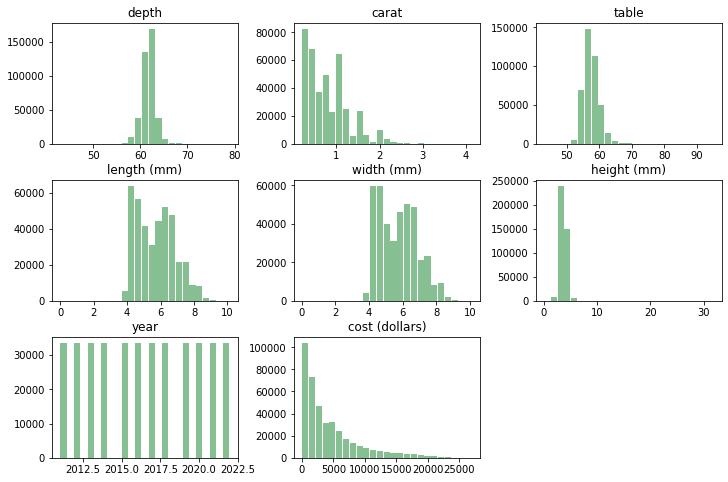

In [ ]:
ax = num_df.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


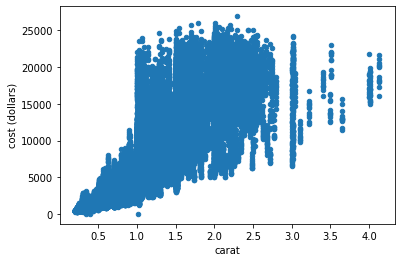

In [ ]:
ax2 = df_e.plot.scatter(x='carat', y='cost (dollars)', colormap='viridis')

In [ ]:
key=['carat']
num_means = df_e.groupby(key).mean()
num_means = num_means[['cost (dollars)']]
num_means.head()


,cost (dollars)
carat,
0.20,404.242857
0.21,430.821429
0.22,454.527778
0.23,543.734275
0.24,557.863438


In [ ]:
key=['color']
num_means = df_e.groupby(key).mean()
num_means = num_means[['cost (dollars)']]
num_means.head()

,cost (dollars)
color,
D,3538.624314
E,3468.523289
F,4183.298187
G,4452.661556
H,4975.520382


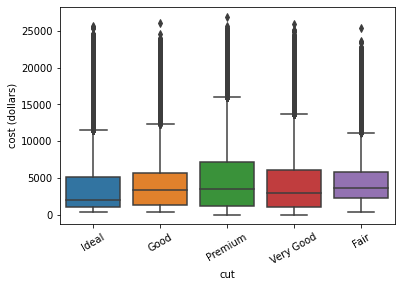

In [ ]:
ax = sns.boxplot(data=df_e, x='cut', y='cost (dollars)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

In [ ]:
key=['cut']
num_means = df_e.groupby(key).mean()
num_means = num_means[['cost (dollars)']]
num_means.head()


,cost (dollars)
cut,
Fair,4828.097935
Good,4377.466254
Ideal,3859.011954
Premium,5136.973780
Very Good,4469.561180


In [ ]:
key=['clarity']
num_means = df_e.groupby(key).mean()
num_means = num_means[['cost (dollars)']]
num_means.head()

,cost (dollars)
clarity,
I1,4328.457404
IF,3220.129710
SI1,4502.830797
SI2,5622.810158
VS1,4313.503957


In [ ]:
key=['year']
num_means = df_e.groupby(key).mean()
num_means = num_means[['cost (dollars)']]
num_means.head()

,cost (dollars)
year,
2011,3932.729731
2012,4011.864491
2013,4094.581299
2014,4177.205178
2015,4257.201268


In [ ]:
#negative values for the price / cost

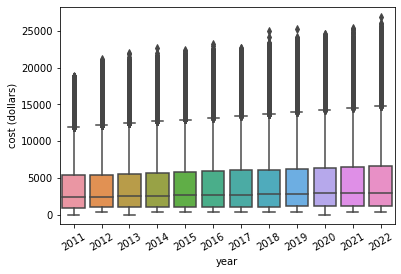

In [ ]:
ax = sns.boxplot(data=df_e, x='year', y='cost (dollars)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

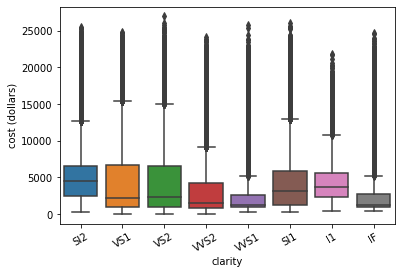

In [ ]:
ax = sns.boxplot(data=df_e, x='clarity', y='cost (dollars)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

<Axes: xlabel='carat'>

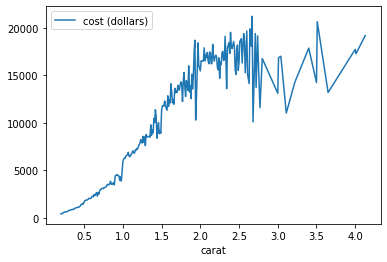

In [ ]:
#define index column

#group data by product and display sales as line chart
df_e.groupby('carat')['cost (dollars)'].mean().plot(legend=True)

In [ ]:
import sys
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [ ]:
#pip install -U scikit-learn

In [ ]:
X = df_e[['carat','cost (dollars)']].copy()
print(X)

        carat  cost (dollars)
0        0.23             326
1        0.23             327
2        0.29             334
3        0.31             335
4        0.24             336
...       ...             ...
407275   0.72            3394
407276   0.72            3256
407277   0.70            3569
407278   0.86            4022
407279   0.75            3465

[403195 rows x 2 columns]


In [ ]:
#!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

In [ ]:
num_initial_model = num_df[['depth','carat','table','length (mm)','width (mm)','cost (dollars)']].copy()
num_initial_model.head()

,depth,carat,table,length (mm),width (mm),cost (dollars)
0,61.5,0.23,55.0,3.95,3.98,326
1,56.9,0.23,65.0,4.05,4.07,327
2,62.4,0.29,58.0,4.20,4.23,334
3,63.3,0.31,58.0,4.34,4.35,335
4,62.8,0.24,57.0,3.94,3.96,336


In [ ]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer

In [ ]:
num_initial_model.describe()

,depth,carat,table,length (mm),width (mm),cost (dollars)
count,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000
mean,61.747836,0.797699,57.457637,5.730003,5.732206,4397.538799
std,1.434466,0.474790,2.240192,1.123060,1.114364,4501.691660
min,43.000000,0.200000,43.000000,0.000000,0.000000,0.000000
25%,61.000000,0.400000,56.000000,4.710000,4.720000,1053.000000
50%,61.800000,0.700000,57.000000,5.690000,5.710000,2677.000000
75%,62.500000,1.040000,59.000000,6.530000,6.530000,5983.000000
max,79.000000,4.130000,95.000000,10.140000,10.100000,26930.000000


# Diamond Prediction

In [ ]:
df_e.head()

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2011
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2011
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2011
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2011
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2011


In [ ]:
df_e.describe()

,index,carat,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
count,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000
mean,16970.542638,0.797699,61.747836,57.457637,4397.538799,5.730003,5.732206,3.538418,2016.500229
std,9797.022994,0.474790,1.434466,2.240192,4501.691660,1.123060,1.114364,0.712369,3.452033
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,8487.000000,0.400000,61.000000,56.000000,1053.000000,4.710000,4.720000,2.910000,2014.000000
50%,16971.000000,0.700000,61.800000,57.000000,2677.000000,5.690000,5.710000,3.520000,2017.000000
75%,25453.000000,1.040000,62.500000,59.000000,5983.000000,6.530000,6.530000,4.030000,2020.000000
max,33939.000000,4.130000,79.000000,95.000000,26930.000000,10.140000,10.100000,31.800000,2022.000000


In [ ]:
num = df_e[['carat','depth','table','cost (dollars)','length (mm)','width (mm)','height (mm)','year']]

In [ ]:
num.head()

,carat,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2011
1,0.23,56.9,65.0,327,4.05,4.07,2.31,2011
2,0.29,62.4,58.0,334,4.20,4.23,2.63,2011
3,0.31,63.3,58.0,335,4.34,4.35,2.75,2011
4,0.24,62.8,57.0,336,3.94,3.96,2.48,2011


In [ ]:
#All the libralies used in this project

import numpy as np 
import pandas as pd 
import seaborn as sns

In [ ]:
df_e['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df_e.head(4)

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2011
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2011
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2011
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2011


In [ ]:
s = (df_e.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [ ]:
df_e.head(4)
cost_sum = df_e['cost (dollars)'].sum()
print(cost_sum)
#cut
#color
#clarity

1773065656


In [ ]:

df_n = df_e[df_e['clarity'].str.contains('I1')]
df_n.head()

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
7,7,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73,2011
9,9,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,2011
12,12,0.30,Good,J,SI1,63.8,56.0,351,4.23,4.26,2.71,2011
13,13,0.30,Very Good,J,SI1,62.7,59.0,351,4.21,4.27,2.66,2011
15,15,0.31,Very Good,J,SI1,59.4,62.0,353,4.39,4.43,2.62,2011


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_data = df_e.copy()
label_data.drop(columns=label_data.columns[0], axis=1,  inplace=True)
label_data = label_data.iloc[: , :-1]

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head(9)

,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm)
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
2,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
3,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
4,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
5,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47
6,0.23,4,4,4,59.4,61.0,338,4.00,4.05,2.39
7,0.30,1,6,2,64.0,55.0,339,4.25,4.28,2.73
8,0.23,2,6,4,62.8,56.0,340,3.93,3.90,2.46


In [ ]:
slt_df = label_data[label_data['clarity'] ==0]
slt_df.head()
  

,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm)
108,1.17,4,6,0,60.2,61.0,2774,6.83,6.90,4.13
130,1.01,3,2,0,61.8,60.0,2781,6.39,6.36,3.94
144,1.01,0,1,0,64.5,58.0,2788,6.29,6.21,4.03
183,0.96,2,2,0,60.7,55.0,2801,6.37,6.41,3.88
188,1.04,3,3,0,62.2,58.0,2801,6.46,6.41,4.00


In [ ]:
df_e.iloc[108]

index                   108
carat                  1.17
cut               Very Good
color                     J
clarity                  I1
depth                  60.2
table                  61.0
cost (dollars)         2774
length (mm)            6.83
width (mm)              6.9
height (mm)            4.13
year                   2011
Name: 108, dtype: object

In [ ]:
label_data.describe()

,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm)
count,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000,403195.000000
mean,0.797699,2.555486,2.600702,3.835960,61.747836,57.457637,4397.538799,5.730003,5.732206,3.538418
std,0.474790,1.027255,1.701462,1.723327,1.434466,2.240192,4501.691660,1.123060,1.114364,0.712369
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,1053.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2677.000000,5.690000,5.710000,3.520000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5983.000000,6.530000,6.530000,4.030000
max,4.130000,4.000000,6.000000,7.000000,79.000000,95.000000,26930.000000,10.140000,10.100000,31.800000


In [ ]:
#cut: 1: Good, 2: Ideal, 3: Premium, 4: 'Very Good'
#color: 0:D, 1: E, 2:F, 3:G, 4:H, 5:I, 6:J
#clarity: 0:I1, 1: IF, 2:SI1, 3:SI2, 4: VS1	, 5:VS2	, 6:VVS1, 7:VVS2	


<Axes: >

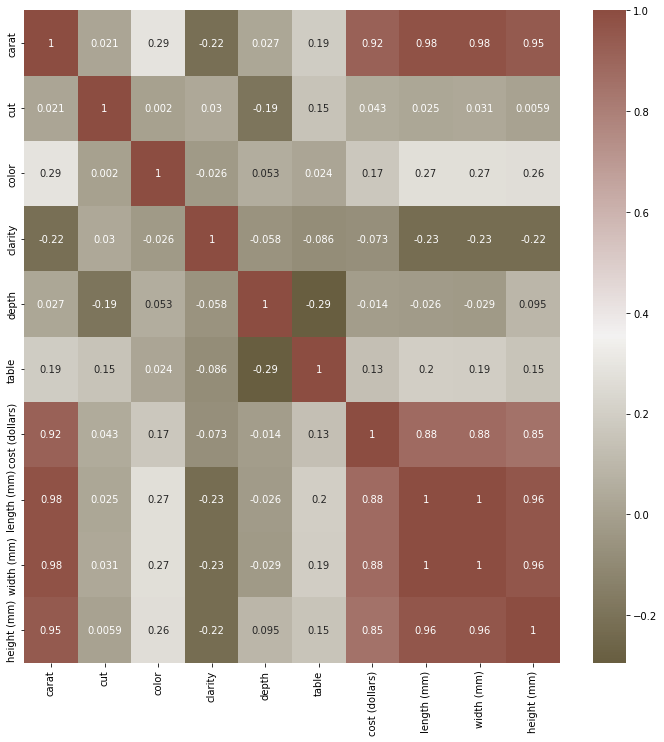

In [ ]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )


In [ ]:
X= label_data.drop(["cost (dollars)"],axis =1)
y= label_data["cost (dollars)"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error
yhat = model.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, yhat))

MAE:  334.5687907905957


In [ ]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, yhat)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))

Mean Absolute Error: 334.5687907905957
Mean Squared Error: 331982.8553692012
Root Mean Squared Error: 576.1795339728766


#Root Mean Squared Error (RMSE)and Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. These metrics tell us how accurate our predictions are and, what is the amount of deviation from the actual values.

In [ ]:
label_data.head()

,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm)
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
2,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
3,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
4,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48


In [ ]:
print('R squared of the Random Forest Regressor on training set: {:.2%}'.format(model.score(X_train, y_train)))
print('R squared of the Random Forest Regressor on test set: {:.2%}'.format(model.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 98.72%
R squared of the Random Forest Regressor on test set: 98.37%


Testing Different Models 
- just to be sure we chose correctly 

Linear Regression

In [ ]:
import sklearn.linear_model as sl
linreg = sl.LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

<Axes: xlabel='cost (dollars)'>

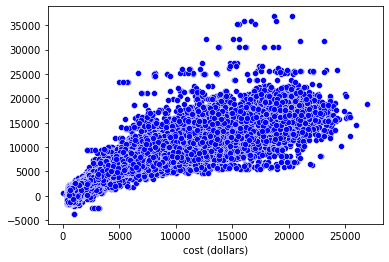

In [ ]:
y_pred_lin = linreg.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred_lin, color="blue")

In [ ]:
print('R squared of the Linear Regressor on training set: {:.2%}'.format(linreg.score(X_train, y_train)))
print('R squared of the Linear Regressor on test set: {:.2%}'.format(linreg.score(X_test, y_test)))

R squared of the Linear Regressor on training set: 87.24%
R squared of the Linear Regressor on test set: 87.52%


Decision Tree

In [ ]:
import sklearn.tree as st
tree = st.DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_tree = tree.predict(X_test)

In [ ]:
print('R squared of the Decision Tree on training set: {:.2%}'.format(tree.score(X_train, y_train)))
print('R squared of the Decision Tree on test set: {:.2%}'.format(tree.score(X_test, y_test)))

R squared of the Decision Tree on training set: 98.72%
R squared of the Decision Tree on test set: 98.37%


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_tree))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))

Mean Absolute Error: 334.3972402249005
Mean Squared Error: 331519.56480868394
Root Mean Squared Error: 575.7773569780978


Final Model Prompt Using Random Forrest Regressor

In [ ]:
predictions = pd.DataFrame({'predicted': yhat})
predictions.head()

,predicted
0,1605.788588
1,2213.904735
2,1416.023529
3,1933.574963
4,2284.852307


In [ ]:
X_test.head()

,carat,cut,color,clarity,depth,table,length (mm),width (mm),height (mm)
27377,0.41,2,1,6,61.7,56.0,4.82,4.78,2.96
302135,0.55,2,3,7,60.5,58.0,5.30,5.34,3.22
264067,0.50,3,3,2,62.9,59.0,5.09,5.06,3.19
130530,0.70,1,6,3,61.6,57.2,5.65,5.68,3.49
404028,0.50,2,0,4,62.2,54.4,5.07,5.11,3.16


In [ ]:
X_test_df = pd.DataFrame(X_test, columns=['carat', 'cut', 'color','clarity','depth','table','length (mm)','width (mm)', 'height (mm)'])
X_test_df.head()

,carat,cut,color,clarity,depth,table,length (mm),width (mm),height (mm)
27377,0.41,2,1,6,61.7,56.0,4.82,4.78,2.96
302135,0.55,2,3,7,60.5,58.0,5.30,5.34,3.22
264067,0.50,3,3,2,62.9,59.0,5.09,5.06,3.19
130530,0.70,1,6,3,61.6,57.2,5.65,5.68,3.49
404028,0.50,2,0,4,62.2,54.4,5.07,5.11,3.16


In [ ]:
y_hats_df = pd.DataFrame(data = yhat, columns = ['y_hat'], index = X_test.index.copy())
#df_out = pd.merge(label_data, y_hats_df, how = 'left', left_index = True, right_index = True)

In [ ]:
merged_predictions = pd.concat([X_test_df, y_hats_df], axis=1)
merged_predictions.head()

,carat,cut,color,clarity,depth,table,length (mm),width (mm),height (mm),y_hat
27377,0.41,2,1,6,61.7,56.0,4.82,4.78,2.96,1605.788588
302135,0.55,2,3,7,60.5,58.0,5.30,5.34,3.22,2213.904735
264067,0.50,3,3,2,62.9,59.0,5.09,5.06,3.19,1416.023529
130530,0.70,1,6,3,61.6,57.2,5.65,5.68,3.49,1933.574963
404028,0.50,2,0,4,62.2,54.4,5.07,5.11,3.16,2284.852307


Sum by Cut

In [ ]:
#Cut Type (1: Good, 2: Ideal, 3: Premium, 4: 'Very Good'): "))
merged_pred = merged_predictions.copy()
merged_pred['cut'].replace({0: 'Fair',1: 'Good', 2: 'Ideal', 3: 'Premium',4:'Very Good'}, inplace=True)
key=['cut']
num_means3 = merged_pred.groupby(key).sum()
num_means3 = num_means3[['y_hat']]
num_means3.head()

,y_hat
cut,
Fair,1.439884e+07
Good,4.001176e+07
Ideal,1.565285e+08
Premium,1.320116e+08
Very Good,1.011360e+08


In [ ]:
#df_out.head(25)

What will the total sales be?

In [ ]:
attribute_sum = merged_predictions['y_hat'].sum()
print(attribute_sum)

444086763.66590655


What is the average predicted diamond sale price in 2023?

In [ ]:
attribute_mean= merged_predictions['y_hat'].mean()
print(attribute_mean)

4405.666362423303


In [ ]:
feature_list = list(X.columns)
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: carat                Importance: 0.6293
Variable: width (mm)           Importance: 0.2566
Variable: clarity              Importance: 0.0662
Variable: color                Importance: 0.0278
Variable: length (mm)          Importance: 0.0075
Variable: height (mm)          Importance: 0.0048
Variable: depth                Importance: 0.0035
Variable: table                Importance: 0.0028
Variable: cut                  Importance: 0.0016


In [ ]:
def plot_feature_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

In [ ]:
def plot_feature_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

In [ ]:
def plot_feature_importance(importance,names,model_type):
  feature_importance = np.array(importance)
  feature_names = np.array(names)
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
  plt.figure(figsize=(10,8))
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')
  plt.show()

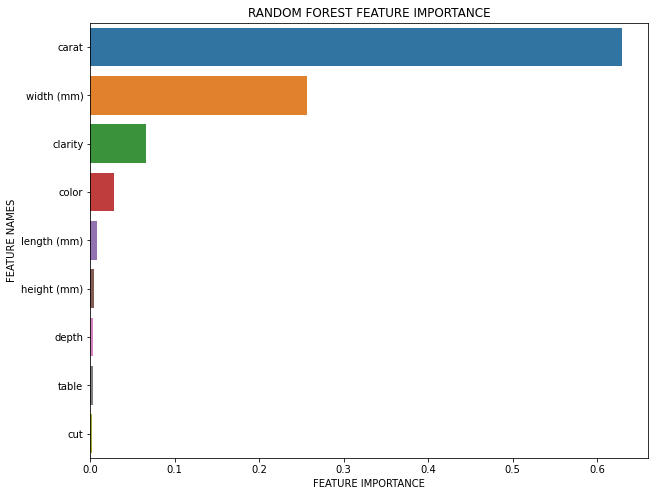

In [ ]:
plot_feature_importance(model.feature_importances_,feature_list,'RANDOM FOREST')

In [ ]:
print("Diamond Price Prediction")
a = float(input("Carat Size: "))
b = int(input("Cut Type (1: Good, 2: Ideal, 3: Premium, 4: 'Very Good'): "))
c = int(input('Color: 0: D, 1: E, 2:F, 3:G, 4: H, 5:I, 6:J'))
d = int(input('Clarity: : 0:I1, 1: IF, 2:SI1, 3:SI2, 4: VS1	, 5:VS2	, 6:VVS1, 7:VVS2' ))
e = float(input('Depth: '))
f = float(input('Table: '))
g = float(input('Length: '))
h = float(input('Width: '))
i = float(input('Height: '))
features = np.array([[a, b, c,d,e,f,g,h,i]])
print("Predicted Diamond's Price = ", model.predict(features))

Diamond Price Prediction
Carat Size: 0.23
Cut Type (1: Good, 2: Ideal, 3: Premium, 4: 'Very Good'): 2
Color: 0: D, 1: E, 2:F, 3:G, 4: H, 5:I, 6:J1
Clarity: : 0:I1, 1: IF, 2:SI1, 3:SI2, 4: VS1	, 5:VS2	, 6:VVS1, 7:VVS23
Depth: 61.5
Table: 55.0
Length: 3.95
Width: 3.98
Height: 2.43
Predicted Diamond's Price =  [361.05569391]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
